In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance_data.csv")
df.age=df.age/100
X=df[['age','affordibility']]
Y=df.bought_insurance

In [3]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

In [4]:
def log_loss(y_true, y_predicted):
    return -np.mean(y_true*np.log(y_predicted)+(1-y_true)*np.log(1-y_predicted))

In [62]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
    def gradient_descent(self, X, Y, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = X.shape[0]
        for i in range(epochs):
            weighted_sum = w1 * X[X.columns[0]] + w2 * X[X.columns[0]] + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(Y, y_predicted)
            
            w1d = (1/n)*np.dot(X[X.columns[0]].T,(y_predicted-Y)) 
            w2d = (1/n)*np.dot(X[X.columns[1]].T,(y_predicted-Y)) 

            bias_d = np.mean(y_predicted-Y)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias
    def fit(self, X, Y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X, Y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test[0] + self.w2*X_test[1] + self.bias
        return sigmoid_numpy(weighted_sum)

In [63]:
customModel = myNN()
customModel.fit(X,Y, epochs=8000, loss_thresold=0.45)

Epoch:0, w1:0.9846732913797102, w2:0.9784416500604985, bias:-0.0929236044198649, loss:0.6738286185808612
Epoch:50, w1:1.4642246304589235, w2:2.148240373568845, bias:-1.3091984834739865, loss:0.54073724381559
Epoch:100, w1:1.8960185110331045, w2:3.4900211445559197, bias:-2.0280489168918288, loss:0.4889350247949037
Epoch:150, w1:2.1719514125610275, w2:4.756338356441231, bias:-2.6533282372773237, loss:0.45596551477157127
Epoch:163, w1:2.222941048993272, w2:5.074521379384149, bias:-2.803195112400282, loss:0.44957565152618695
Final weights and bias: w1: 2.222941048993272, w2: 5.074521379384149, bias: -2.803195112400282


In [64]:
customModel.predict([0.25,0])

0.09556879833255548

In [6]:
def gradient_descent(X, Y, epochs, loss_thresold, learning_rate):
        number_of_features=X.shape[1]
        w=np.ones(shape=number_of_features)
        bias=0
        n = X.shape[0]
        cost_list=[]
        epochs_list=[]
        
        for i in range(epochs):
            weighted_sum = np.dot(w,X.T) + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            MSE=np.mean(np.square(Y-y_predicted))

            
            w_grad = -(2/n)*np.dot(X.T,Y-y_predicted)
            b_grad = -(2/n)*np.sum(Y-y_predicted)
            w = w - learning_rate * w_grad
            bias = bias - learning_rate * b_grad         
            
            if i%10==0:
                cost_list.append(MSE)
                epochs_list.append(i)
            
            if MSE<=loss_thresold:
                print (f'Epoch:{i}, w:{w}, bias:{bias}, loss:{MSE}')
                break

        return w, bias, cost_list,epochs_list

In [11]:
w, bias, cost_list,epochs_list=gradient_descent(X, Y, 8000,0.1, learning_rate=0.5)

Epoch:915, w:[11.20961774  1.90605992], bias:-5.867211105714951, loss:0.09999739253183552


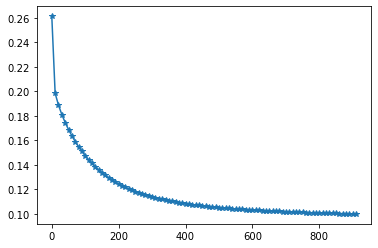

In [13]:
plt.plot(epochs_list,cost_list, marker='*')

# stochastic_gradient_descent

In [148]:
def stochastic_gradient_descent(X, Y, epochs, loss_thresold, learning_rate):
        number_of_features=X.shape[1]
        w=np.ones(shape=number_of_features)
        bias=0
        n = X.shape[0]
        cost_list=[]
        epochs_list=[]
        for i in range(epochs):
            sample_list=list(np.random.randint(0,n-1,size=10))
            X_sample=X.iloc[sample_list] 
            Y_sample=Y.iloc[sample_list] 
            weighted_sum = np.dot(w,X_sample.T) + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            MSE=np.mean(np.square(Y_sample-y_predicted))

            
            w_grad = -2*np.dot(X_sample.T,Y_sample-y_predicted)
            b_grad = -2*np.sum(Y_sample-y_predicted)
            w = w - learning_rate * w_grad
            bias = bias - learning_rate * b_grad         
            
            if i%10==0:
                cost_list.append(MSE)
                epochs_list.append(i)
                print (f'Epoch:{i}, w:{w}, bias:{bias}, loss:{MSE}')
            
            if MSE<=loss_thresold:
                print (f'Epoch:{i}, w:{w}, bias:{bias}, loss:{MSE}')
                break

        return w, bias, cost_list,epochs_list

In [149]:
w, bias, cost_list,epochs_list=stochastic_gradient_descent(X, Y, 5000,0.01, learning_rate=0.05)

Epoch:0, w:[0.86339286 0.64914488], bias:-0.5334842859784031, loss:0.4115984600176999
Epoch:10, w:[1.15215136 1.1233869 ], bias:-0.9128359049796501, loss:0.15747003331400297
Epoch:20, w:[1.48707483 1.19175894], bias:-1.1514049283158458, loss:0.1948717842269432
Epoch:30, w:[1.82777835 1.27482577], bias:-1.3297562055610364, loss:0.19860536693663616
Epoch:40, w:[2.13228746 1.44975298], bias:-1.5066645556664449, loss:0.19417241008034578
Epoch:50, w:[2.33832122 1.21406719], bias:-1.90233148098767, loss:0.18149220451556722
Epoch:60, w:[2.62269573 1.49029573], bias:-2.14044603298882, loss:0.15611611506609652
Epoch:70, w:[2.97752154 1.57625019], bias:-2.234869120204697, loss:0.15003489967865558
Epoch:80, w:[3.30966093 1.62618851], bias:-2.3646609568663153, loss:0.1108844819102813
Epoch:90, w:[3.59167023 1.37395338], bias:-2.5481034995069165, loss:0.19043158033131738
Epoch:100, w:[3.94761346 1.6150412 ], bias:-2.5262951798160542, loss:0.11229103203707388
Epoch:110, w:[4.15068667 1.77072352], bi

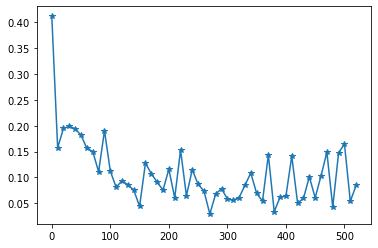

In [150]:
plt.plot(epochs_list,cost_list, marker='*')